## MOLECULAR SYNTHESIS & RECONSTRUCTION

This is the Python repository about the Deep Learning And Applied Artificial Intelligence Project 2019/2020 in the Computer Science Master's Degree course of La Sapienza University of Rome.

## Goal Description

The goal was to develop Deep Learning models that can reconstruct molecules as best as possible and generate new molecules. The idea was to analyze the paper [[1]](https://pubs.rsc.org/en/content/articlepdf/2019/me/c9me00039a): choose a representation of the molecules among the proposed one, choose a type of model and try different models of the same type (RNN, VAE, AAE, GAN ..) and choose different metrics on which evaluate models. The actual goal has been to get models that reconstruct and generate new ones in a good enough way compared to other models that are state of the art.

Here is a brief summary of what is reported in this notebook.

The whole project is divided into parts:
- Molecular Representation & Dataset
- Preprocessing
- Models Building and Training 
- Molecules Reconstruction
- Molecules Synthesis 

### Molecular Representation & Dataset

Among the representations presented in the paper, it was chosen to use the representation as a SMILE string. [[1]](https://pubs.rsc.org/en/content/articlepdf/2019/me/c9me00039a) shows the various models present in the state of the art and for each model:

- the chosen architecture.
- the representation of the molecules used.
- the dataset used.
- the number of examples in the dataset.

It has been observed that the ZINC dataset was used very often for the SMILE string representation. More specifically, a subset of the ZINC dataset that contains approximately 250,000 examples called ZINC250K. It was therefore decided to use the ZINC250K dataset for this work.

### Preprocessing

In preprocessing it was first of all chosen to choose the approach to transform the representation as a SMILE string. In order not to obtain excessively large sparse arrays with too much padding, after observing the distribution of the lengths of the strings, we have chosen to use only SMILE strings of length minus or equal than 60. In order to evaluate the goodness of the reconstruction, it was decided to split the main dataset in *train set* e *test set*: *train set* 70% - *test set* 30%. The training phase was carried out only in the train set.

### Models Building and Training

The chosen models type is the VAE (Varational Autoencoder). Two different VAEs have been implemented:

- Convolutional Encoder - Convolutional Decoder
- Convolutional Encoder - GRU (Multi-layer) + Linear layer

For both models, different training sessions were carried out with specific tuning set for 35 training epochs. Having observed that in both models it is not necessary to have 35 epochs to obtain an efficient model, a new instance of each of the two model types with the most efficient setting out of 35 epochs has been trained for a smaller number of epochs resulting in truly efficient models.

### Molecules Reconstruction

In the reconstruction phase, the best model of both types was evaluated for its goodness in reconstructing the molecules. The reconstruction consists in obtaining the representation in latent space and then it is reconstructed obtaining the starting molecule. The more the model has learned latent space well, the better it will be able to return to the starting molecule. It was decided to observe the accuracy of the molecule reconstruction and the validity ratio of the reconstructed molecules both on the test set and on the train set.

For the Convolutional Encoder - Convolutional Decoder:


| Dataset| Recontruction | Validity  
|---|---|---|
| train |  99.91%  | 99.94%  |
| test  |  96.80%  | 97.91%  |


For the Convolutional Encoder - GRU + Linear Decoder: 

| Dataset| Recontruction | Validity  
|---|---|---|
| train |  99.72%  | 99.78%  |
| test  |  93.63%  | 99.79%  |

### Molecules Synthesis

In the synthesis phase, new molecules were generated by sampling from the prior distribution chosen for the latent space. To generate new molecules:

<p align = "center">
  <img src= "https://latex.codecogs.com/gif.latex?stdev&space;\times&space;\mathcal{N}(0,&space;1)&space;&plus;&space;latent" />

To generate new molecules, it was chosen to start from a molecule (i.e. from the representation of the latent space of the chosen molecule) and perturb it through the above formula in order to obtain new molecules (topologically similar). The only unknown data in the formula is the standard deviation *stdev*. To observe the generation as we move further and further away from the starting molecule it was decided to use the following values for *stdev*: [0.045, 0.065, 0.085]. So it was decided to make 5000 samples for each of the three chosen values.

Furthermore, it was decided to choose two different starting molecules to generate new molecules not present in the train set. For each of these, 5000 samples were made for each possible value of the standard deviation.

Given ![](https://latex.codecogs.com/gif.latex?\mathcal{G}) the set of chemically valid molecules, ![](https://latex.codecogs.com/gif.latex?\mathcal{D}) the train set, ![](https://latex.codecogs.com/gif.latex?n) the number of syntatically valid generated molecules, ![](https://latex.codecogs.com/gif.latex?n_{samp}) the number of sampling done, the following metrics were used to evaluate the generation of molecules:

![](https://latex.codecogs.com/gif.latex?Syntatic\&space;Validity\&space;Ratio:\&space;\&space;\&space;\&space;\&space;\&space;\&space;\&space;\&space;\&space;\&space;\&space;\&space;\frac{n}{n_{samp}})
  
![](https://latex.codecogs.com/gif.latex?Chemical\&space;Validity\&space;Ratio:&space;\&space;\&space;\&space;\&space;\&space;\&space;\&space;\frac{|\mathcal{G}|}{n})
   
![](https://latex.codecogs.com/gif.latex?Uniqness:&space;\vspace{0.5cm}&space;\frac{|set(\mathcal{G})|}{n})   

![](https://latex.codecogs.com/gif.latex?Novelty:\&space;\&space;\&space;\&space;1&space;-&space;\frac{|\mathcal{G}&space;\cap&space;\mathcal{D}|}{|\mathcal{G}|})

![](https://latex.codecogs.com/gif.latex?SimilarityRatio:\&space;\&space;\&space;\&space;\frac{\sum_{i=0}^{|\mathcal{G}|}&space;\sum_{j=i&plus;1}^{|\mathcal{G}|}&space;TanimotoSim(\mathcal{G}_i,&space;\mathcal{G}_j)}{\frac{|\mathcal{G}|(|\mathcal{G}|-&space;1)}{2}})

where TanimotoSim is the Tanimoto Similarity defined as:

<p align = "center">
  <img src= "https://latex.codecogs.com/gif.latex?TanimotoSim(A,&space;B)&space;=&space;\frac{A&space;\cdot&space;B}{||A||^2&space;&plus;&space;||B||^2&space;-&space;A&space;\cdot&space;B}" />

The scores are reported only in the notebook.

Credit: https://github.com/leonardopicchiami/molecular_synthesis_and_reconstruction

In [1]:
# Clone the repository and cd into directory
!git clone https://github.com/leonardopicchiami/molecular_synthesis_and_reconstruction.git
%cd /content/molecular_synthesis_and_reconstruction

Cloning into 'molecular_synthesis_and_reconstruction'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 162 (delta 60), reused 34 (delta 8), pack-reused 0
Receiving objects: 100% (162/162), 1.73 MiB | 5.65 MiB/s, done.
Resolving deltas: 100% (60/60), done.
/content/molecular_synthesis_and_reconstruction


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DRIVE_PATH = "/content/drive/MyDrive/drug_discovery"
DRIVE_DATASET_PATH = "{0}/datasets".format(DRIVE_PATH)
DRIVE_CODE_PATH = "{0}/code".format(DRIVE_PATH)
DATASET_PATH = "{0}/250k_rndm_zinc_drugs_clean.smi".format(DRIVE_DATASET_PATH)

TRAIN_SET_PATH = '{0}/train_set.csv'.format(DRIVE_DATASET_PATH)
TEST_SET_PATH = '{0}/test_set.csv'.format(DRIVE_DATASET_PATH)

GENERATED_SMILE_PATH = "{0}/csv_data_synt".format(DRIVE_PATH)
IMAGES_PATH = '{0}/images'.format(DRIVE_PATH)
ERROR_DATA_PATH = '{0}/csv_data'.format(DRIVE_PATH)
RECON_DATA_PATH = "{0}/recon_data".format(DRIVE_PATH)

MODELS_PATH = "{0}/trained_models".format(DRIVE_PATH)
CONV_CONV_MODELS_PATH = "{0}/conv_encoder-conv_decoder".format(MODELS_PATH)
CONV_GRU_MODELS_PATH = "{0}/conv_encoder-gru_decoder".format(MODELS_PATH)

import sys
sys.path.append("{0}/preprocessing/".format(DRIVE_CODE_PATH))
sys.path.append("{0}/utils/".format(DRIVE_CODE_PATH))
sys.path.append("{0}/models/".format(DRIVE_CODE_PATH))
sys.path.append("{0}/postprocessing/".format(DRIVE_CODE_PATH))

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
from torchvision import transforms
from torch.utils.data import DataLoader
import torch
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm

import one_hot_encoding as enc
import one_hot_decoding as dec
import smile_dataset as smi_data
import molecular_vae as mod
import encoder.convolutional_encoder as cov_enc
import decoder.convolutional_decoder as cov_dec
import decoder.gru_decoder as gru_dec
import utils as ut

In [5]:
DATASET_PATH = "{0}/250k_rndm_zinc_drugs_clean.smi".format(DRIVE_DATASET_PATH)

all_smiles = pd.read_csv(DATASET_PATH, names=['smiles'])
all_smiles = pd.DataFrame(all_smiles.values, columns = ["smiles"])
print(all_smiles.tail())

                                                   smiles
249451   CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc21
249452  Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...
249453             Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1
249454         Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1
249455  O=C(CC(c1ccccc1)c1ccccc1)N1CCN(S(=O)(=O)c2cccc...


In [6]:
save = False

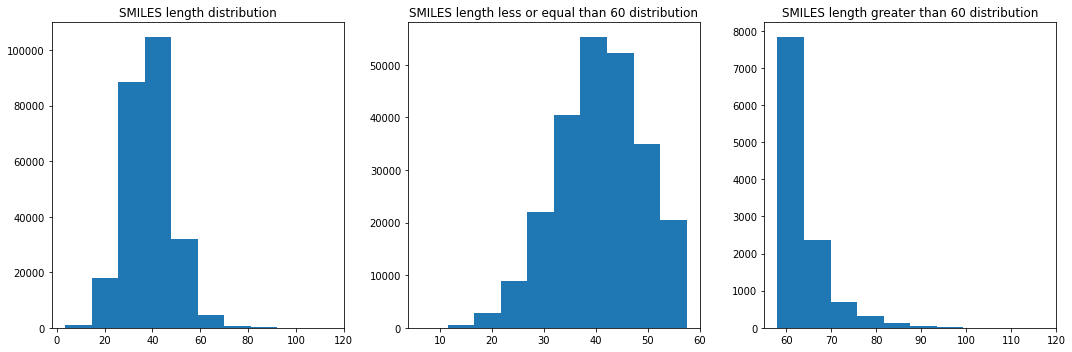

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
axes[0].set_title("SMILES length distribution")
axes[0].hist(all_smiles['smiles'].str.len(), align = 'left')
axes[1].set_title("SMILES length less or equal than 60 distribution")
axes[1].hist(all_smiles[all_smiles['smiles'].str.len() <= 60]['smiles'].str.len(), align = 'left')
axes[2].set_title("SMILES length greater than 60 distribution")
axes[2].hist(all_smiles[all_smiles['smiles'].str.len() > 60]['smiles'].str.len(), align = 'left')
fig.tight_layout()

if not save:
    plt.show()
else:
    plt.savefig("{0}/length_distributions.png".format(IMAGES_PATH))
    plt.clf()

In [8]:
print("SMILES max length: {0}".format(all_smiles['smiles'].str.len().max()))
print("SMILES min length: {0}".format(all_smiles['smiles'].str.len().min()))

print("Number of SMILES with length less or equal than 60: {0}".format(len(all_smiles[all_smiles['smiles'].str.len() <= 60])))
print("Number of SMILES with length greather than 60: {0}".format(len(all_smiles[all_smiles['smiles'].str.len() > 60])))

SMILES max length: 120
SMILES min length: 9
Number of SMILES with length less or equal than 60: 238026
Number of SMILES with length greather than 60: 11430


In [9]:
train_set, test_set = train_test_split(all_smiles[all_smiles['smiles'].str.len() <= 60], test_size = 0.3)

train_set.to_csv(TRAIN_SET_PATH)
test_set.to_csv(TEST_SET_PATH)

print("Number of molecules in train set: {0}".format(len(train_set)))
print("Number of molecules in test set: {0}".format(len(test_set)))

Number of molecules in train set: 166618
Number of molecules in test set: 71408


In [10]:
CHARSET = [' ', '#', '(', ')', '+', '-', '/', '1', '2', '3', '4', '5', '6', '7',
        '8', '=', '@', 'B', 'C', 'F', 'H', 'I', 'N', 'O', 'P', 'S', '[', '\\', ']',
        'c', 'l', 'n', 'o', 'r', 's']

In [11]:
charset = [' ']

for smile in tqdm(all_smiles['smiles'], total = len(all_smiles['smiles'])):
    for c in smile:
        if c not in charset:
            charset.append(c)

isbreak = False
for l in CHARSET:
    if l not in charset:
        print(l)
        isbreak = True
        break

if not isbreak:
    print("The vocabulary CHARSET contain all needed characters.")
else:
    print("The vocabulary CHARSET does not contain all needed characters.")


The vocabulary CHARSET contain all needed characters.


In [12]:
smile = "CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1"

hot_enc = enc.OneHotEcodingHandler(charset=CHARSET)
one_hot_encoding = hot_enc.one_hot_encoding(smile)

print(one_hot_encoding)
print("\nOne hot encoding shape: {0}".format(one_hot_encoding.shape))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

One hot encoding shape: (39, 35)


In [13]:
hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)

decoded_smile = hot_dec.one_hot_decoding(one_hot_encoding)
decoded_smile

'CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1'

In [14]:
smile == decoded_smile

True

In [15]:
BATCH_SIZE = 24

In [16]:
transformation = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

smile_dataset = smi_data.SmileDataset(TRAIN_SET_PATH, transform=transformation, smile_length = 60)

data_loader = DataLoader(
    smile_dataset,
    batch_size = BATCH_SIZE,
    shuffle = True,
)

x = data_loader.dataset[0]

print("The dimension 0: {0}".format(x.shape[0]))
print("The dimension 1: {0}".format(x.shape[1]))
print("The dimension 2: {0}".format(x.shape[2]))

The dimension 0: 1
The dimension 1: 60
The dimension 2: 35


In [17]:
#Hyperparameters

#Number of epochs for training
NUM_EPOCHS = 35

#Hidden channel dimension
HIDDEN_CHANNEL = 32

#Latent space dimension
LATENT_SPACE_DIM = 196

#Convolutional layer kernel size
KERNEL_SIZE = 3

#Stride is the number of pixels shifts over the input matrix
STRIDE = 1

#Padding size to add around the matrix.
PADDING = 1

In [18]:
use_gpu = True
device = torch.device("cuda:0" if use_gpu and torch.cuda.is_available() else "cpu")

In [19]:
#Hyperparameters that vary depending on the training

reparametrization = 'type1'
dropout = None

In [20]:
conv_encoder = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu',
                                                    dropout = dropout) 

conv_decoder = cov_dec.ConvDecoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu')

conv_vae = mod.MolecularVae(conv_encoder, conv_decoder, repar_type = reparametrization)

In [21]:
optimizer = torch.optim.Adam(params=conv_vae.parameters())

In [22]:
conv_vae = conv_vae.to(device)
loss_epochs_resume = ut.model_train(conv_vae, data_loader, optimizer, NUM_EPOCHS, ut.vae_loss_function, device)

In [23]:
#inference
torch.save(conv_vae.state_dict(), '{0}/conv-conv-mode-riparam1_state-dict.pt'.format(CONV_CONV_MODELS_PATH))

#entire model
torch.save(conv_vae, '{0}/conv-conv-mode-riparam1_model.pt'.format(CONV_CONV_MODELS_PATH))

In [24]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])

print(error_time_frame.tail())
error_time_frame.to_csv('{0}/conv-conv-model-ripar1_loss.csv'.format(ERROR_DATA_PATH))

    epochs         loss
30      31  1895.705894
31      32  1892.310828
32      33  1889.378492
33      34  1884.767248
34      35  1882.236010


In [25]:
#Hyperparameters that vary depending on the training
import torch.nn as nn

reparametrization = 'type2'
dropout = nn.Dropout2d(p = 0.2)

In [26]:
conv_encoder2 = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu', 
                                                    dropout = dropout) 

conv_decoder2 = cov_dec.ConvDecoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu')

conv_vae2 = mod.MolecularVae(conv_encoder2, conv_decoder2, repar_type = reparametrization)

In [27]:
optimizer2 = torch.optim.Adam(params=conv_vae2.parameters())

In [28]:
conv_vae2 = conv_vae2.to(device)
loss_epochs_resume = ut.model_train(conv_vae2, data_loader, optimizer2, NUM_EPOCHS, ut.vae_loss_function, device)

In [29]:
#save weights
torch.save(conv_vae2.state_dict(), '{0}/conv-conv-model-dropout-ripar2_state-dict.pt'.format(CONV_CONV_MODELS_PATH))

#save entire model
torch.save(conv_vae2, '{0}/conv-conv-model-dropout-ripar2_entire-model.pt'.format(CONV_CONV_MODELS_PATH))

In [30]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])

print(error_time_frame.tail())
error_time_frame.to_csv('{0}/conv-conv-model-dropout-ripar2_loss.csv'.format(ERROR_DATA_PATH))

    epochs       loss
30      31  73.663980
31      32  60.087835
32      33  63.688721
33      34  59.786749
34      35  64.156787


In [31]:
error_loss_repar1 = pd.read_csv('{0}/conv-conv-model-ripar1_loss.csv'.format(ERROR_DATA_PATH))
error_loss_repar2 = pd.read_csv('{0}/conv-conv-model-dropout-ripar2_loss.csv'.format(ERROR_DATA_PATH))

fig = go.Figure()
fig.add_trace(go.Scatter(x = error_loss_repar1['epochs'], y = error_loss_repar1['loss'], mode = 'lines', name = 'conv_conv_repar1'))
fig.add_trace(go.Scatter(x = error_loss_repar2['epochs'], y = error_loss_repar2['loss'], mode = 'lines', name = 'conv_conv_dropout_repar2'))

fig.update_layout(
        title = 'Reconstruction train average error convolutional encoder-decoder VAEs',
        xaxis_title = "Epoch",
        yaxis_title = "Reconstruction errror")

fig.show()

In [32]:
optimal_num_epocs = loss_epochs_resume.index(min(loss_epochs_resume)) + 1
print(optimal_num_epocs)

14


In [33]:
conv_encoder3 = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu', 
                                                    dropout = nn.Dropout2d(p = 0.2)) 

conv_decoder3 = cov_dec.ConvDecoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu')

conv_vae3 = mod.MolecularVae(conv_encoder3, conv_decoder3, repar_type = 'type2')

In [34]:
optimizer3 = torch.optim.Adam(params=conv_vae3.parameters())

In [35]:
conv_vae3 = conv_vae3.to(device)
loss_epochs_resume = ut.model_train(conv_vae3, data_loader, optimizer3, optimal_num_epocs, ut.vae_loss_function, device)

In [36]:
#save weights
torch.save(conv_vae3.state_dict(), '{0}/conv-conv-model-dropout-ripar2_state-dict_17epochs.pt'.format(CONV_CONV_MODELS_PATH))

#save entire model
torch.save(conv_vae3, '{0}/conv-conv-model-dropout-ripar2_entire-model_17epochs.pt'.format(CONV_CONV_MODELS_PATH))

In [38]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])

print(error_time_frame.tail())
error_time_frame.to_csv('{0}/conv-conv-model-dropout-ripar2_loss_17epochs.csv'.format(ERROR_DATA_PATH))

    epochs       loss
9       10  42.556555
10      11  38.993870
11      12  41.462008
12      13  41.826134
13      14  37.290372


In [39]:
error_loss_repar1_17epochs = pd.read_csv('{0}/conv-conv-model-dropout-ripar2_loss_17epochs.csv'.format(ERROR_DATA_PATH))

fig = go.Figure()
fig.add_trace(go.Scatter(x = error_loss_repar1_17epochs['epochs'], y = error_loss_repar1_17epochs['loss'], mode = 'lines', name = 'conv_conv_repar2'))

fig.update_layout(
        title = 'Reconstruction train average error convolutional encoder-decoder VAE 17 epochs',
        xaxis_title = "Epoch",
        yaxis_title = "Reconstruction errror")

fig.show()

In [40]:
##Hyperparameters unchanged

#Latent space dimension
LATENT_SPACE_DIM = 196

#Number of epochs for training
NUM_EPOCHS = 35

##Encoder hyperparameters

#Hidden channel dimension
HIDDEN_CHANNEL = 32

#Convolutional layer kernel size
KERNEL_SIZE = 3

#Stride is the number of pixels shifts over the input matrix
STRIDE = 1

#Padding size to add around the matrix.
PADDING = 1

## Decoder hyperparameters

#Hidden dimension
HIDDEN_DIM = HIDDEN_CHANNEL * 2

#Linear dimension
LINEAR_DIM = HIDDEN_CHANNEL * 2 * 60

In [41]:
#Hyperparameters that vary depending on the training

#Layers number of GRU multi-layers
NUM_LAYERS = 5

#GRU dropout probability
GRU_DROPOUT = 0

#Reparametrization implementation type
REPARAMETRIZATION = 'type1'

In [42]:
conv_encoder = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns =x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function='relu', 
                                                    dropout = nn.Dropout2d(p=0.2)) 

gru_decoder = gru_dec.GRULinearDecoder(one_hot_columns = x.shape[1], 
                                       one_hot_rows = x.shape[2], 
                                       hidden_dim = HIDDEN_DIM,
                                       linear_dim = LINEAR_DIM,
                                       latent_dim = LATENT_SPACE_DIM,
                                       num_layers = NUM_LAYERS,
                                       dropout = GRU_DROPOUT,
                                       isBidirectional = False)

conv_gru_vae = mod.MolecularVae(conv_encoder, gru_decoder, repar_type = REPARAMETRIZATION)

In [43]:
optimizer = torch.optim.Adam(params = conv_gru_vae.parameters())

In [44]:
conv_gru_vae = conv_gru_vae.to(device)
loss_epochs_resume = ut.model_train(conv_gru_vae, data_loader, optimizer, NUM_EPOCHS, ut.vae_loss_function, device)

In [45]:
#save weights
torch.save(conv_gru_vae.state_dict(), '{0}/conv-gru-model-5layers-ripar1_state-dict.pt'.format(CONV_GRU_MODELS_PATH))

#save entire model
torch.save(conv_gru_vae, '{0}/conv-gru-model-5layers-ripar1_entire-model.pt'.format(CONV_GRU_MODELS_PATH))

In [46]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])

print(error_time_frame.tail())
error_time_frame.to_csv('{0}/conv-gru-model-5layers-ripar1_loss.csv'.format(ERROR_DATA_PATH))

    epochs         loss
30      31  4057.046040
31      32  4057.013260
32      33  4057.005692
33      34  4056.958866
34      35  4056.986620


In [47]:
#Hyperparameters that vary depending on the training

#Layers number of GRU multi-layers
NUM_LAYERS = 2

#GRU dropout probability
GRU_DROPOUT = 0.3

#Reparametrization implementation type
REPARAMETRIZATION = 'type2'

In [48]:
conv_encoder2 = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu', 
                                                    dropout = nn.Dropout2d(p=0.2)) 

gru_decoder2 = gru_dec.GRULinearDecoder(one_hot_columns = x.shape[1], 
                                       one_hot_rows = x.shape[2], 
                                       hidden_dim = HIDDEN_DIM,
                                       linear_dim = LINEAR_DIM,
                                       latent_dim = LATENT_SPACE_DIM,
                                       num_layers = NUM_LAYERS,
                                       dropout = GRU_DROPOUT,
                                       isBidirectional = False)

conv_gru_vae2 = mod.MolecularVae(conv_encoder2, gru_decoder2, repar_type = REPARAMETRIZATION)

In [49]:
optimizer2 = torch.optim.Adam(params = conv_gru_vae2.parameters())

In [50]:
conv_gru_vae2 = conv_gru_vae2.to(device)
loss_epochs_resume = ut.model_train(conv_gru_vae2, data_loader, optimizer2, NUM_EPOCHS, ut.vae_loss_function, device)

In [51]:
#save weights
torch.save(conv_gru_vae2.state_dict(), '{0}/conv-gru-model-dropout03-2layers-ripar2_state-dict.pt'.format(CONV_GRU_MODELS_PATH))

#save entire model
torch.save(conv_gru_vae2, '{0}/conv-gru-model-dropout03-2layers-ripar2_model.pt'.format(CONV_GRU_MODELS_PATH))

In [53]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])

print(error_time_frame.tail())
error_time_frame.to_csv('{0}/conv-gru-model-2layers-dropout-ripar2_loss.csv'.format(ERROR_DATA_PATH))

    epochs       loss
30      31  57.685249
31      32  56.522617
32      33  61.572953
33      34  54.923883
34      35  53.755193


In [54]:
#Hyperparameters that vary depending on the training

#Layers number of GRU multi-layers
NUM_LAYERS = 2

#GRU dropout probability
GRU_DROPOUT = 0

#Reparametrization implementation type
REPARAMETRIZATION = 'type2'

In [55]:
conv_encoder3 = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function= ' relu', 
                                                    dropout = nn.Dropout2d(p=0.2)) 

gru_decoder3 = gru_dec.GRULinearDecoder(one_hot_columns = x.shape[1], 
                                       one_hot_rows = x.shape[2], 
                                       hidden_dim = HIDDEN_DIM,
                                       linear_dim = LINEAR_DIM,
                                       latent_dim = LATENT_SPACE_DIM,
                                       num_layers = NUM_LAYERS,
                                       dropout = GRU_DROPOUT,
                                       isBidirectional = False)

conv_gru_vae3 = mod.MolecularVae(conv_encoder3, gru_decoder3, repar_type = REPARAMETRIZATION)

In [56]:
optimizer3 = torch.optim.Adam(params=conv_gru_vae3.parameters())

In [ ]:
conv_gru_vae3 = conv_gru_vae3.to(device)
loss_epochs_resume = ut.model_train(conv_gru_vae3, data_loader, optimizer3, NUM_EPOCHS, ut.vae_loss_function, device)

In [ ]:
#save weights
torch.save(conv_gru_vae3.state_dict(), '{0}/conv-gru-model-5layers-ripar2_state-dict.pt'.format(CONV_GRU_MODELS_PATH))

#save entire model
torch.save(conv_gru_vae3, '{0}/conv-gru-model-5layers-ripar2_entire-model.pt'.format(CONV_GRU_MODELS_PATH))

In [ ]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])

print(error_time_frame.tail())
error_time_frame.to_csv('{0}/conv-gru-model-5layers-ripar2_loss.csv'.format(ERROR_DATA_PATH))

In [ ]:
error_loss_repar0 = pd.read_csv('{0}/conv-gru-model-5layers-ripar1_loss.csv'.format(ERROR_DATA_PATH))
error_loss_repar1 = pd.read_csv('{0}/conv-gru-model-2layers-dropout-ripar2_loss.csv'.format(ERROR_DATA_PATH))
error_loss_repar2 = pd.read_csv('{0}/conv-gru-model-5layers-ripar2_loss.csv'.format(ERROR_DATA_PATH))

fig = go.Figure()
fig.add_trace(go.Scatter(x = error_loss_repar0['epochs'], y = error_loss_repar0['loss'], mode = 'lines', name = 'conv_gru5layers_repar1'))
fig.add_trace(go.Scatter(x = error_loss_repar1['epochs'], y = error_loss_repar1['loss'], mode = 'lines', name = 'conv_gru_2layers_dropout_ripart2'))
fig.add_trace(go.Scatter(x = error_loss_repar2['epochs'], y = error_loss_repar2['loss'], mode = 'lines', name = 'conv_gru_5layer_repar2'))

fig.update_layout(
        title='Reconstruction train average error Convolutional Encoder - GRU + Linear Decoder VAEs',
        xaxis_title="Epoch",
        yaxis_title="Reconstruction errror")

fig.show()

In [58]:
#Hyperparameters that vary depending on the training

#Number of training epochs
NUM_EPOCHS = 15

#Layers number of GRU multi-layers
NUM_LAYERS = 5

#GRU dropout probability
GRU_DROPOUT = 0

#Reparametrization implementatio type
REPARAMETRIZATION = 'type2'

In [59]:
conv_encoder4 = cov_enc.ConvEncoder(in_channels = 1, one_hot_columns = x.shape[1], 
                                                    one_hot_rows = x.shape[2], 
                                                    hidden_channels = HIDDEN_CHANNEL,
                                                    latent_dim = LATENT_SPACE_DIM,
                                                    kernel_size = KERNEL_SIZE,
                                                    stride = STRIDE,
                                                    padding = PADDING,
                                                    activation_function = 'relu', 
                                                    dropout = nn.Dropout2d(p=0.2)) 

gru_decoder4 = gru_dec.GRULinearDecoder(one_hot_columns = x.shape[1], 
                                       one_hot_rows = x.shape[2], 
                                       hidden_dim = HIDDEN_DIM,
                                       linear_dim = LINEAR_DIM,
                                       latent_dim = LATENT_SPACE_DIM,
                                       num_layers = NUM_LAYERS,
                                       dropout = GRU_DROPOUT,
                                       isBidirectional = False)

conv_gru_vae4 = mod.MolecularVae(conv_encoder4, gru_decoder4, repar_type = REPARAMETRIZATION)

In [60]:
optimizer4 = torch.optim.Adam(params = conv_gru_vae4.parameters())

In [61]:
conv_gru_vae4 = conv_gru_vae4.to(device)
loss_epochs_resume = ut.model_train(conv_gru_vae4, data_loader, optimizer4, NUM_EPOCHS, ut.vae_loss_function, device)

In [62]:
#save weights
torch.save(conv_gru_vae4.state_dict(), '{0}/conv-gru-model-5layers-ripar2_state-dict_15epochs.pt'.format(CONV_GRU_MODELS_PATH))

#save entire model
torch.save(conv_gru_vae4, '{0}/conv-gru-model-5layers-ripar2_entire-model_15epochs.pt'.format(CONV_GRU_MODELS_PATH))

In [63]:
num_epocs = np.arange(1, len(loss_epochs_resume) + 1)
error_time_frame = pd.DataFrame(list(zip(num_epocs, loss_epochs_resume)), columns=['epochs', 'loss'])

print(error_time_frame.tail())
error_time_frame.to_csv('{0}/conv-gru-model-5layers-ripar2_15epochs-loss.csv'.format(ERROR_DATA_PATH))

    epochs       loss
10      11  84.399474
11      12  83.882098
12      13  82.807989
13      14  79.365764
14      15  78.262998


In [64]:
error_loss_repar0 = pd.read_csv('{0}/conv-gru-model-5layers-ripar2_15epochs-loss.csv'.format(ERROR_DATA_PATH))

fig = go.Figure()
fig.add_trace(go.Scatter(x = error_loss_repar0['epochs'], y = error_loss_repar0['loss'], mode = 'lines', name = 'conv_gru5layers_repar2_15epochs'))
fig.update_layout(
        title='Reconstruction train average error Convolutional Encoder - GRU + Linear Decoder VAEs 15 epochs',
        xaxis_title="Epoch",
        yaxis_title="Reconstruction errror")

fig.show()

In [ ]:
!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

In [66]:
!pip install rdkit-pypi==2021.3.1.5

     |████████████████████████████████| 18.0 MB 43 kB/s 


In [67]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [68]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.rdDepictor import Compute2DCoordsMimicDistmat
from rdkit import RDLogger

IPythonConsole.ipython_useSVG=False
RDLogger.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.info')

In [69]:
#Load pretained model
conv_conv_model = torch.load(
    "{0}/conv-conv-model-dropout-ripar2_entire-model_17epochs.pt".format(CONV_CONV_MODELS_PATH), map_location=torch.device('cuda:0')
    )

In [70]:
transformation = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

train_frame = pd.read_csv(TRAIN_SET_PATH)

smile_train_dataset = smi_data.SmileDataset(TRAIN_SET_PATH, transform=transformation, smile_length=60)

train_data_loader = DataLoader(
    smile_train_dataset,
    batch_size = 1000,
    shuffle = False,
    num_workers=4
)

In [71]:
conv_conv_model.eval()

#train_loss_averager = make_averager()

tot_correct_recostructed = 0
smiles_recon = []

with torch.no_grad():
    
    one_hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)
    train_bar = tqdm(train_data_loader, total = len(train_data_loader))
    for smile_batch in train_bar:
        smile_batch = smile_batch.to("cuda:0")
        reconstructed_smile, _, _ = conv_conv_model.forward((smile_batch.float()))
      
        for i in range(len(smile_batch)):
            smile = smile_batch[i].reshape(-1, smile_batch[i].shape[1], smile_batch[i].shape[2])
            original_smile_string = one_hot_dec.one_hot_decoding(smile[0].to("cpu"))
            reconstructed_smile_string = one_hot_dec.one_hot_decoding(reconstructed_smile[i][0].to("cpu"))

            smiles_recon.append(reconstructed_smile_string)

            if (original_smile_string == reconstructed_smile_string):
                tot_correct_recostructed += 1

        ut.refresh_bar(train_bar, desc = "")

    print("Reconstruction accuracy train set: {0}".format(tot_correct_recostructed / len(smile_train_dataset)))

smiles_rec_frame = pd.DataFrame(list(zip(train_frame['smiles'], smiles_recon)), columns=['smiles', 'reconstructed_smiles'])
smiles_rec_frame.to_csv("{0}/conv_conv-reconstruced_train.csv".format(RECON_DATA_PATH))


Reconstruction accuracy train set: 0.9986556074373717


In [72]:
reconstructed_smile_train = pd.read_csv("{0}/conv_conv-reconstruced_train.csv".format(RECON_DATA_PATH))
valid_reconstructed = 0 

for smile in tqdm(reconstructed_smile_train['reconstructed_smiles'], total = len(reconstructed_smile_train['reconstructed_smiles'])):
    mol = Chem.MolFromSmiles(smile)
    if mol:
         valid_reconstructed += 1

print("Chemical validity ratio of the reconstructed molecules of the train set: {0}".format(valid_reconstructed / len(reconstructed_smile_train['reconstructed_smiles'])))


Chemical validity ratio of the reconstructed molecules of the train set: 0.9990877336182166


In [73]:
transformation = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

test_frame = pd.read_csv(TEST_SET_PATH)
smile_test_dataset = smi_data.SmileDataset(TEST_SET_PATH, transform=transformation, smile_length=60)

test_data_loader = DataLoader(
    smile_test_dataset,
    batch_size = 1000,
    shuffle = False,
    num_workers=4
)

In [74]:
conv_conv_model.eval()

test_loss_averager = ut.make_averager()

tot_correct_recostructed = 0
smiles_recon = []

with torch.no_grad():
    
    one_hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)
    test_bar = tqdm(test_data_loader, total=len(test_data_loader), desc = 'batch [loss: ...]')
    for smile_batch in test_bar:
        smile_batch = smile_batch.to("cuda:0")
        reconstructed_smile, latent_mu, latent_logvar = conv_conv_model(smile_batch.float())
        loss = ut.vae_loss_function(reconstructed_smile, smile_batch.float(), latent_mu, latent_logvar)
      
        for i in range(len(smile_batch)):
            smile = smile_batch[i].reshape(-1, smile_batch[i].shape[1], smile_batch[i].shape[2])
            original_smile_string = one_hot_dec.one_hot_decoding_with_padding(smile[0].to("cpu"))
            reconstructed_smile_string = one_hot_dec.one_hot_decoding_with_padding(reconstructed_smile[i][0].to("cpu"))

            smiles_recon.append(reconstructed_smile_string)

            if (original_smile_string == reconstructed_smile_string):
                tot_correct_recostructed += 1

        ut.refresh_bar(test_bar, desc = f"test batch [loss: {test_loss_averager(loss.item()):.3f}]")


    print(f'Average test loss: {test_loss_averager(None)})')
    print("Reconstruction accuracy test set: {0}".format(tot_correct_recostructed / len(smile_test_dataset)))

smiles_rec_frame = pd.DataFrame(list(zip(test_frame['smiles'], smiles_recon)), columns=['smiles', 'reconstructed_smiles'])
smiles_rec_frame.to_csv("{0}/conv_conv-reconstruced_test.csv".format(RECON_DATA_PATH))


Average test loss: 1467.983118693034)
Reconstruction accuracy test set: 0.9644297557696616


In [75]:
reconstructed_smile_test = pd.read_csv("{0}/conv_conv-reconstruced_test.csv".format(RECON_DATA_PATH))

valid_reconstructed = 0 

for smile in tqdm(reconstructed_smile_test['reconstructed_smiles'], total = len(reconstructed_smile_test['reconstructed_smiles'])):
    mol = Chem.MolFromSmiles(smile)
    if mol:
         valid_reconstructed += 1

print("Chemical validity ratio of the reconstructed molecules of the test set: {0}".format(valid_reconstructed / len(reconstructed_smile_test['reconstructed_smiles'])))


Chemical validity ratio of the reconstructed molecules of the test set: 0.9771874299798342


In [76]:
#Load pretained model
conv_gru_model = torch.load(
    "{0}/conv-gru-model-5layers-ripar2_entire-model_15epochs.pt".format(CONV_GRU_MODELS_PATH), map_location=torch.device('cpu')
    )

In [77]:
transformation = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

train_frame = pd.read_csv(TRAIN_SET_PATH)
smile_train_dataset = smi_data.SmileDataset(TRAIN_SET_PATH, transform=transformation, smile_length=60)

train_data_loader = DataLoader(
    smile_train_dataset,
    batch_size = 1000,
    shuffle = False,
    num_workers=4
)

In [78]:
conv_gru_model.eval()

#train_loss_averager = make_averager()

tot_correct_recostructed = 0
smiles_recon = []

with torch.no_grad():
    
    one_hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)
    train_bar = tqdm(train_data_loader, total = len(train_data_loader))
    for smile_batch in train_bar:
        smile_batch = smile_batch.to("cpu")
        reconstructed_smile, _, _ = conv_gru_model(smile_batch.float())

        for i in range(len(smile_batch)):
            smile = smile_batch[i].reshape(-1, smile_batch[i].shape[1], smile_batch[i].shape[2])
            original_smile_string = one_hot_dec.one_hot_decoding_with_padding(smile[0].to("cpu"))
            reconstructed_smile_string = one_hot_dec.one_hot_decoding_with_padding(reconstructed_smile[i][0].to("cpu"))

            smiles_recon.append(reconstructed_smile_string)

            if (original_smile_string == reconstructed_smile_string):
                tot_correct_recostructed += 1

        ut.refresh_bar(train_bar, desc = "")

    print("Reconstruction accuracy train set: {0}".format(tot_correct_recostructed / len(smile_train_dataset)))

smiles_rec_frame = pd.DataFrame(list(zip(train_frame['smiles'], smiles_recon)), columns=['smiles', 'reconstructed_smiles'])
smiles_rec_frame.to_csv("{0}/conv_gru-reconstruced_train.csv".format(RECON_DATA_PATH))


Reconstruction accuracy train set: 0.9979293953834519


In [80]:
reconstructed_smile_train = pd.read_csv("{0}/conv_gru-reconstructed_train.csv".format(RECON_DATA_PATH))

valid_reconstructed = 0 

for smile in tqdm(reconstructed_smile_train['reconstructed_smiles'], total = len(reconstructed_smile_train['reconstructed_smiles'])):
    mol = Chem.MolFromSmiles(smile)
    if mol:
         valid_reconstructed += 1

print("Chemical validity ratio of the reconstructed molecules of the test set: {0}".format(valid_reconstructed / len(reconstructed_smile_train['reconstructed_smiles'])))


Chemical validity ratio of the reconstructed molecules of the test set: 0.9986316004273248


In [81]:
transformation = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

test_frame = pd.read_csv(TEST_SET_PATH)
smile_test_dataset = smi_data.SmileDataset(TEST_SET_PATH, transform=transformation, smile_length=60)

test_data_loader = DataLoader(
    smile_test_dataset,
    batch_size = 1000,
    shuffle = False,
    num_workers=4
)

In [82]:
conv_gru_model.eval()

test_loss_averager = ut.make_averager()

tot_correct_recostructed = 0
smiles_recon = []

with torch.no_grad():
    
    one_hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)
    test_bar = tqdm(test_data_loader, total=len(test_data_loader), desc = 'batch [loss: ...]')
    for smile_batch in test_bar:
        smile_batch = smile_batch.to("cpu")
        #reconstructed_smile, _, _ = conv_gru_model(smile_batch.float())
        reconstructed_smile, latent_mu, latent_logvar = conv_gru_model(smile_batch.float())
        loss = ut.vae_loss_function(reconstructed_smile, smile_batch.float(), latent_mu, latent_logvar)
      
        for i in range(len(smile_batch)):
            smile = smile_batch[i].reshape(-1, smile_batch[i].shape[1], smile_batch[i].shape[2])
            original_smile_string = one_hot_dec.one_hot_decoding_with_padding(smile[0].to("cpu"))
            reconstructed_smile_string = one_hot_dec.one_hot_decoding_with_padding(reconstructed_smile[i][0].to("cpu"))

            smiles_recon.append(reconstructed_smile_string)

            if (original_smile_string == reconstructed_smile_string):
                tot_correct_recostructed += 1

        ut.refresh_bar(test_bar, f"test batch [loss: {test_loss_averager(loss.item()):.3f}]")

    print(f'Average test loss: {test_loss_averager(None)})')
    print("Reconstruction accuracy test set: {0}".format(tot_correct_recostructed / len(smile_test_dataset)))

smiles_rec_frame = pd.DataFrame(list(zip(test_frame['smiles'], smiles_recon)), columns=['smiles', 'reconstructed_smiles'])
smiles_rec_frame.to_csv("{0}/conv_gru-reconstructed_test.csv".format(RECON_DATA_PATH))


Average test loss: 2096.3134155273438)
Reconstruction accuracy test set: 0.9461825005601613


In [83]:
reconstructed_smile_test = pd.read_csv("{0}/conv_gru-reconstructed_test.csv".format(RECON_DATA_PATH))

valid_reconstructed = 0
 
for smile in tqdm(reconstructed_smile_test['reconstructed_smiles'], total = len(reconstructed_smile_test['reconstructed_smiles'])):
    mol = Chem.MolFromSmiles(smile)
    if mol:
         valid_reconstructed += 1

print("Chemical validity ratio of the reconstructed molecules of the test set: {0}".format(valid_reconstructed / len(reconstructed_smile_test['reconstructed_smiles'])))


Chemical validity ratio of the reconstructed molecules of the test set: 0.9621330943311673


In [ ]:
!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [95]:
import molecules_synthetizer as mol_gen
import metrics as me

In [84]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.rdDepictor import Compute2DCoordsMimicDistmat
from rdkit import RDLogger

IPythonConsole.ipython_useSVG=False
RDLogger.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.info')

In [85]:
import random
torch.manual_seed(42)
np.random.seed(42)
random.seed(0)

torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True  # Note that this Deterministic mode can have a performance impact
torch.backends.cudnn.benchmark = False

In [86]:
def print_statistics(valid_synt_ratio : float, 
                     valid_chem_ratio : float,
                     uniqueness_ratio : float,
                     novelty_ratio : float,
                     tanimoto_average : float):
    
    print("The ratio of syntatically valid synthetized molecules: {0}".format(valid_synt_ratio))
    print("The ratio of chemically valid synthetized molecules: {0}".format(valid_chem_ratio))
    print("The ratio of unique chemically valid synthetized molecules: {0}".format(uniqueness_ratio))
    print("The ratio of novelty chemically valid synthetized molecules: {0}".format(novelty_ratio))
    print("The average of Tanimoto Similarity ratio: {0}".format(tanimoto_average))

In [87]:
aspirine_smile = 'CC(=O)Oc1ccccc1C(=O)O'
print(aspirine_smile)

CC(=O)Oc1ccccc1C(=O)O


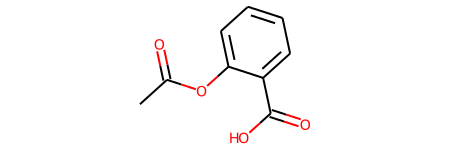

In [88]:
Chem.MolFromSmiles(aspirine_smile)

In [89]:
tamiflu_smile = 'CCOC(=O)C1=CC(OC(CC)CC)C(NC(C)=O)C(N)C1'
print(tamiflu_smile)

CCOC(=O)C1=CC(OC(CC)CC)C(NC(C)=O)C(N)C1


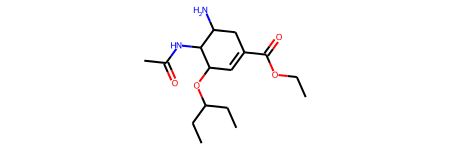

In [90]:
Chem.MolFromSmiles(tamiflu_smile)

In [92]:
#Load pretained model
conv_conv_model = torch.load(
    "{0}/conv-conv-model-dropout-ripar2_entire-model_17epochs.pt".format(CONV_CONV_MODELS_PATH), map_location=torch.device('cpu')
    )

In [93]:
one_hot_enc = enc.OneHotEcodingHandler(charset=CHARSET, pad_length=60)
one_hot_dec = dec.OneHotDecodingHandler(charset=CHARSET)

In [98]:
synthetizer_aspirine = mol_gen.MoleculesSynthetizer(
    model = conv_conv_model,
    smile_string = aspirine_smile,
    latent_dim = 196,
    one_hot_encoder = one_hot_enc,
    one_hot_decoder = one_hot_dec,
    device = 'cpu'
)

In [99]:
std_dev = 0.045
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



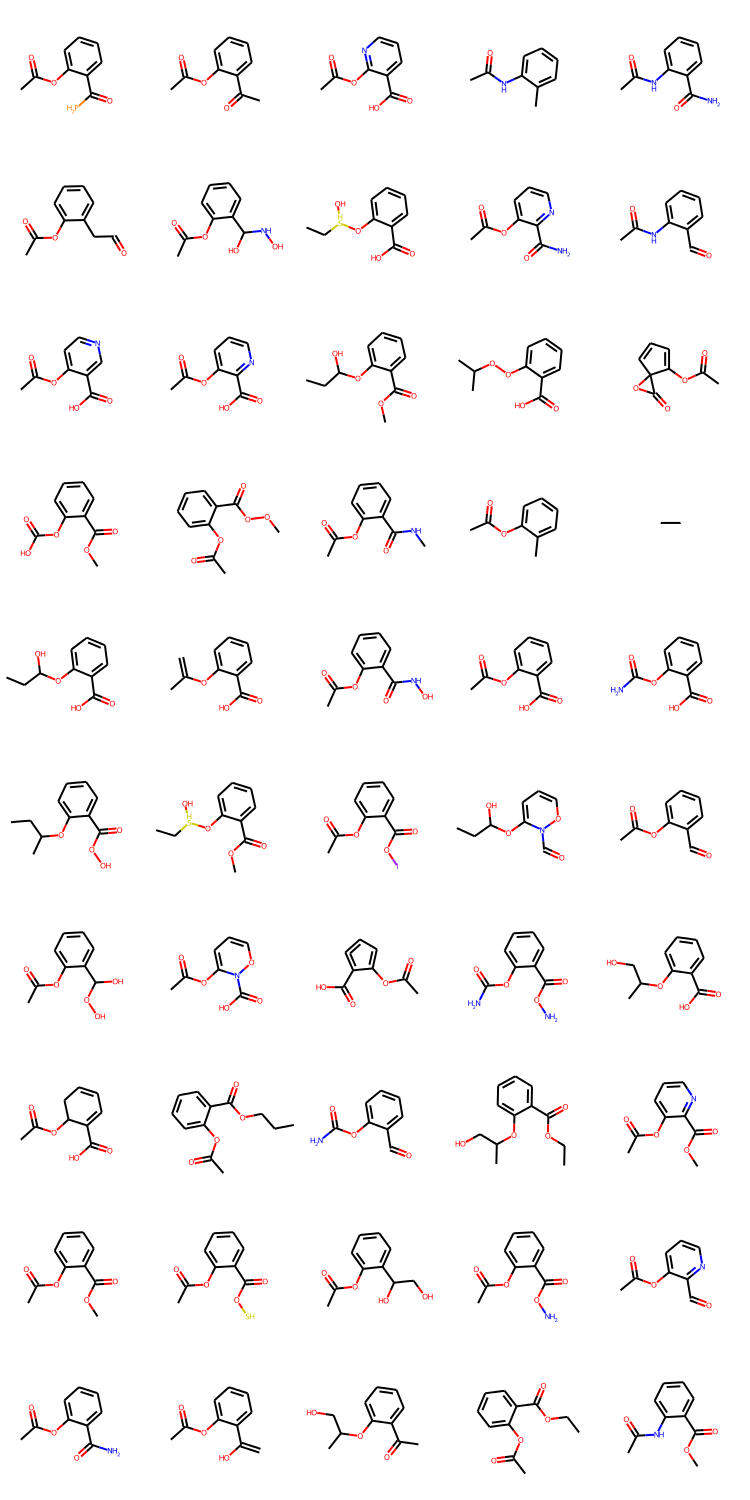

In [101]:
synthetizer_aspirine.smile_to_csv("{0}/conv-conv_aspirine_045.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150
    # save_path = '{0}/grid_conv-conv_aspirine_045.png'.format(IMAGES_PATH)
)

In [102]:
std_dev = 0.065
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



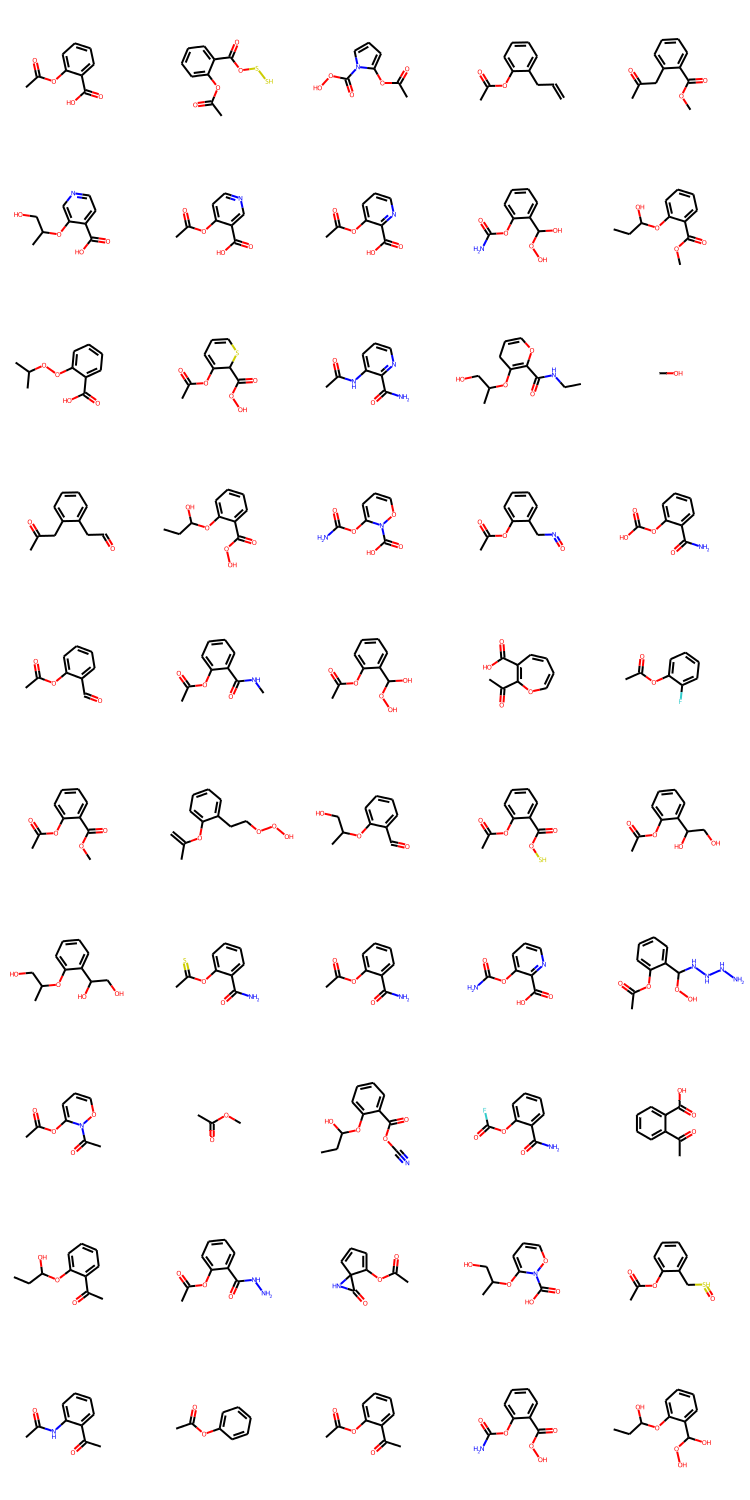

In [104]:
synthetizer_aspirine.smile_to_csv("{0}/conv-conv_aspirine_065.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150
    # save_path = '{0}/grid_conv-conv_aspirine_065.png'.format(IMAGES_PATH)
)

In [105]:
std_dev = 0.085
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



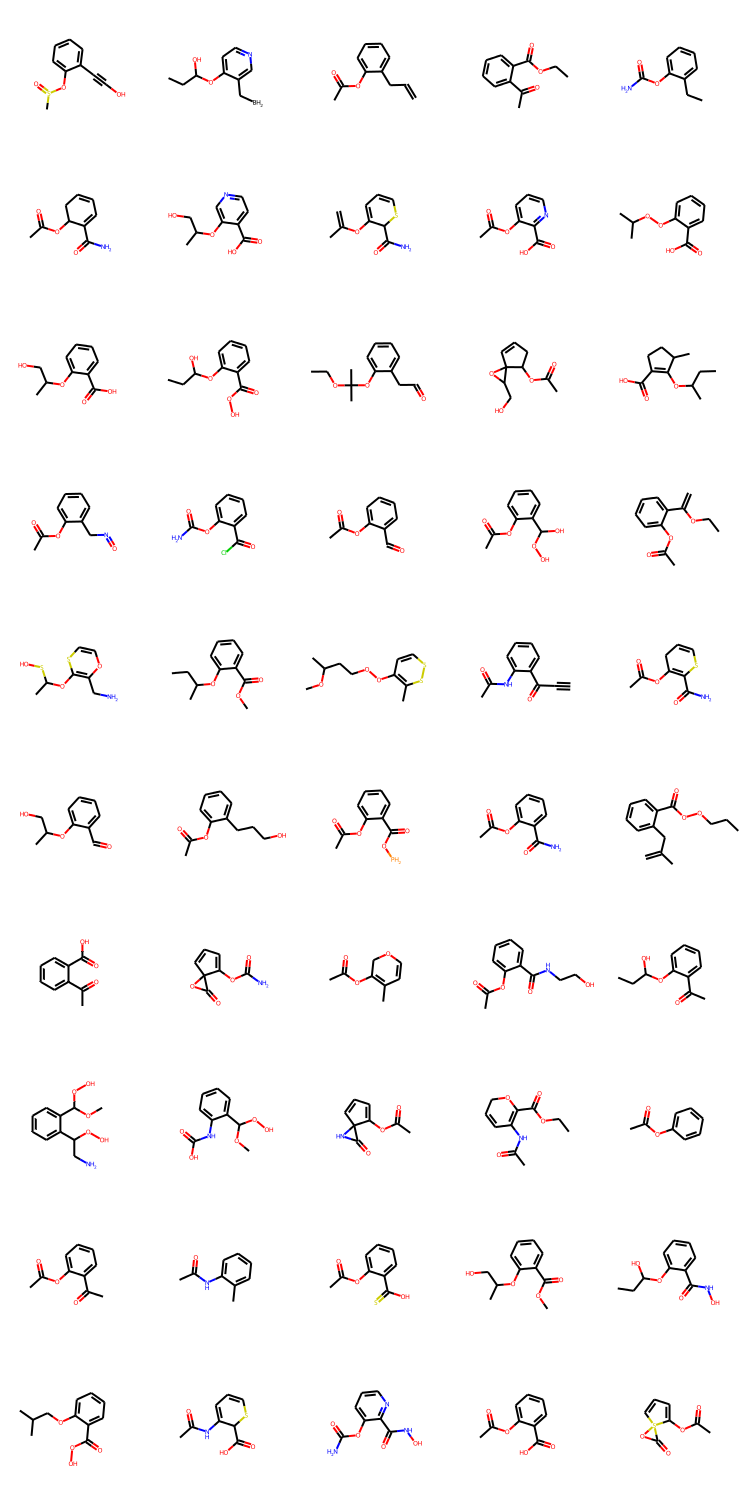

In [106]:
synthetizer_aspirine.smile_to_csv("{0}/conv-conv_aspirine_085.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 100,
    mols_per_rows = 5,
    image_size = 150
    # save_path = '{0}/grid_conv-conv_aspirine_085.png'.format(IMAGES_PATH)
)

In [107]:
synthetizer_tamiflu = mol_gen.MoleculesSynthetizer(
    model=conv_conv_model,
    smile_string = tamiflu_smile,
    latent_dim = 196,
    one_hot_encoder = one_hot_enc,
    one_hot_decoder = one_hot_dec,
    device = 'cpu'
)

In [108]:
std_dev = 0.045
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



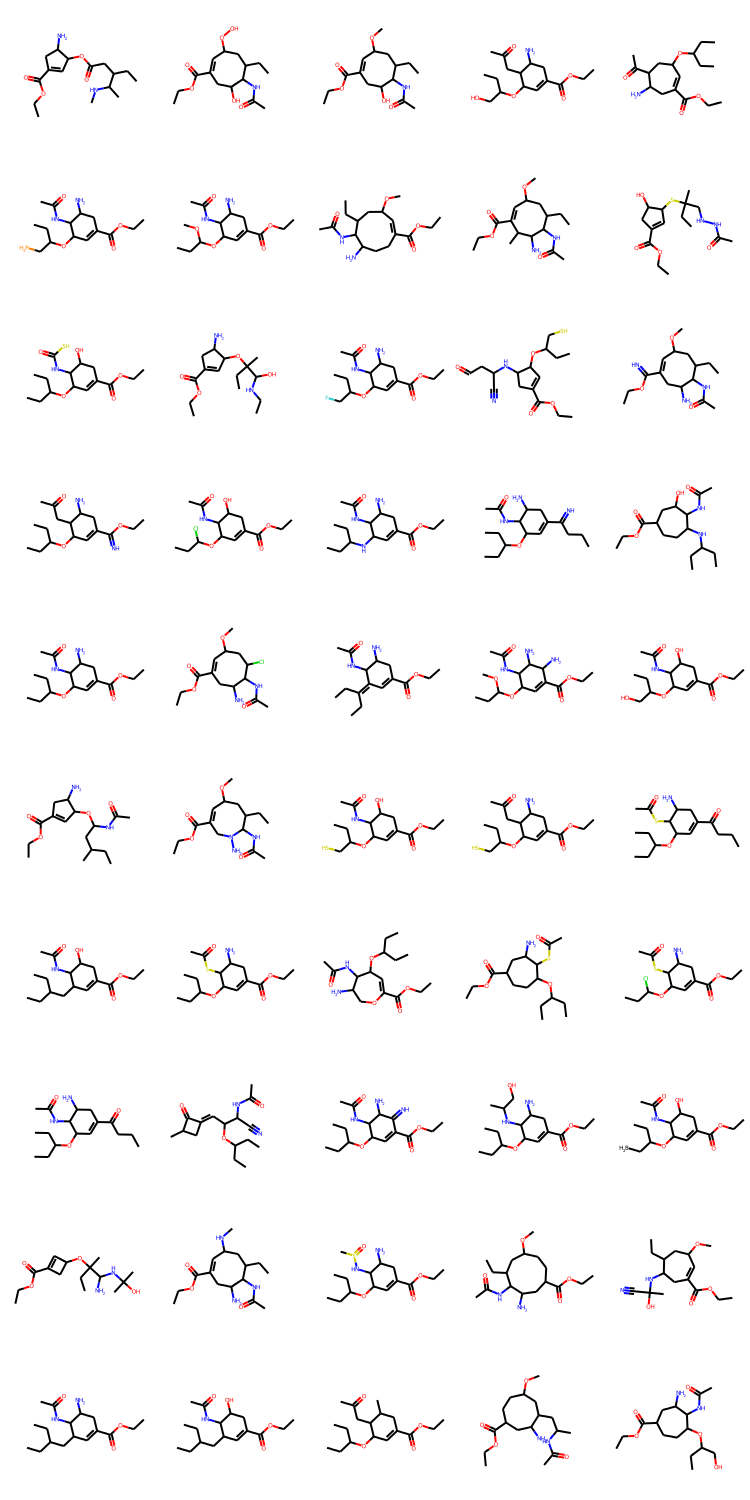

In [109]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-conv_tamiflu_045.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150
    # save_path = '{0}/grid_conv-conv_tamiflu_045.png'.format(IMAGES_PATH)
)

In [110]:
std_dev = 0.065
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



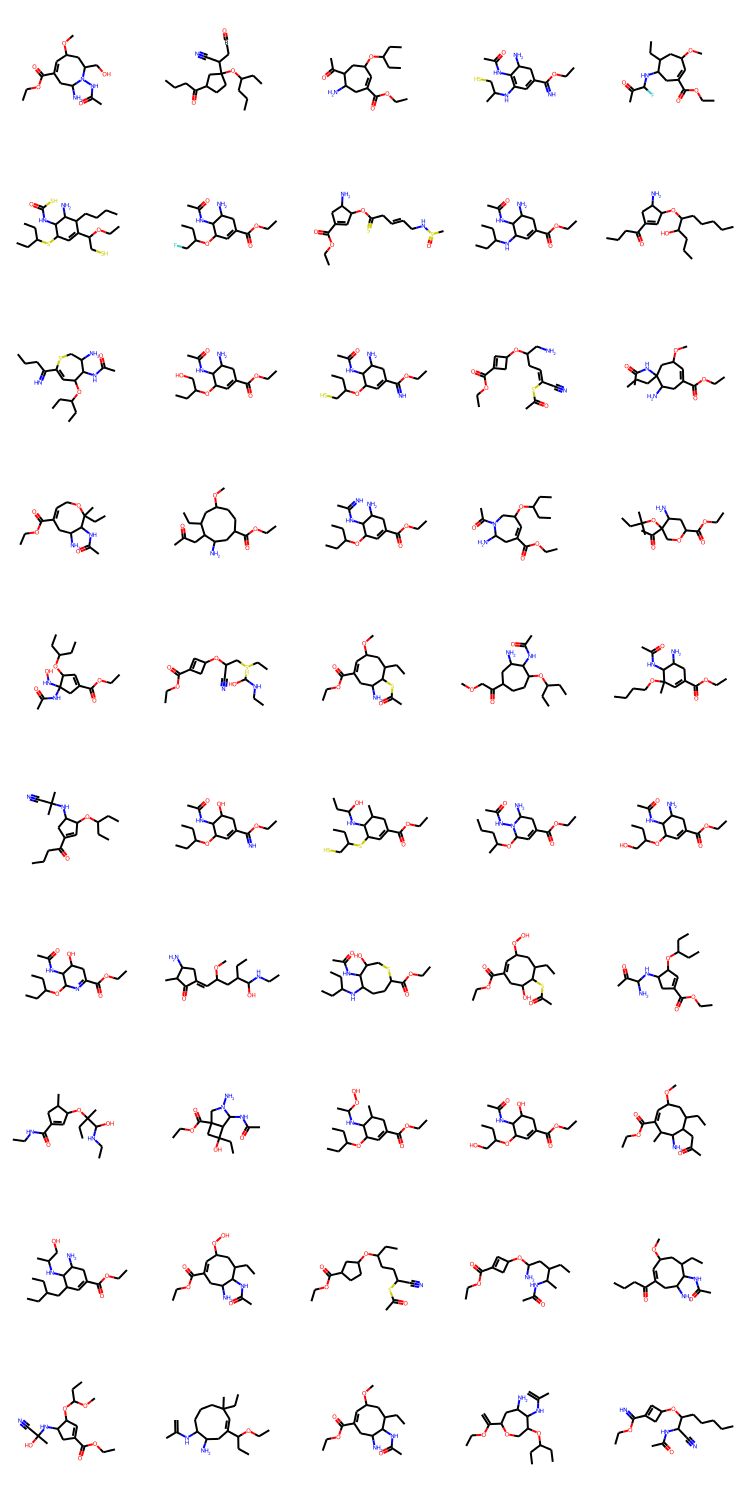

In [111]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-conv_tamiflu_065.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 100,
    mols_per_rows = 5,
    image_size = 150
    # save_path = '{0}/grid_conv-conv_tamiflu_065.png'.format(IMAGES_PATH)
)

In [112]:
std_dev = 0.085
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

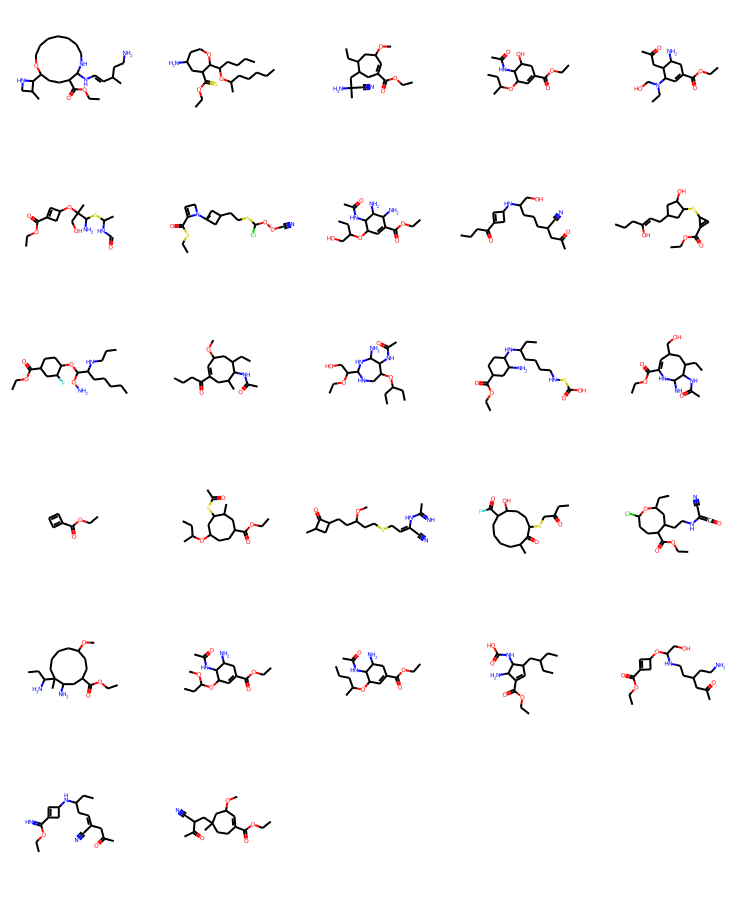

In [113]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-conv_tamiflu_085.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150 
    # save_path = '{0}/grid_conv-conv_tamiflu_085.png'.format(IMAGES_PATH)
)

In [114]:
conv_conv_aspirine_045 = pd.read_csv("{0}/conv-conv_aspirine_045.csv".format(GENERATED_SMILE_PATH))
conv_conv_aspirine_065 = pd.read_csv("{0}/conv-conv_aspirine_065.csv".format(GENERATED_SMILE_PATH))
conv_conv_aspirine_085 = pd.read_csv("{0}/conv-conv_aspirine_085.csv".format(GENERATED_SMILE_PATH))

conv_conv_tamiflu_045 = pd.read_csv("{0}/conv-conv_tamiflu_045.csv".format(GENERATED_SMILE_PATH))
conv_conv_tamiflu_065 = pd.read_csv("{0}/conv-conv_tamiflu_065.csv".format(GENERATED_SMILE_PATH))
conv_conv_tamiflu_085 = pd.read_csv("{0}/conv-conv_tamiflu_085.csv".format(GENERATED_SMILE_PATH))

train_set = pd.read_csv(TRAIN_SET_PATH)

In [115]:
synthetized_aspirine_045 = conv_conv_aspirine_045['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_aspirine_045)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_aspirine_045) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.765
The ratio of chemically valid synthetized molecules: 0.9223529411764706
The ratio of unique chemically valid synthetized molecules: 0.017290249433106575
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.8913129568057385


In [116]:
synthetized_aspirine_065 = conv_conv_aspirine_065['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_aspirine_065)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(conv_conv_aspirine_065) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.341
The ratio of chemically valid synthetized molecules: 0.6211143695014663
The ratio of unique chemically valid synthetized molecules: 0.1954674220963173
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.5764969038393143


In [117]:
synthetized_aspirine_085 = conv_conv_aspirine_085['synthetized_smiles']
chem_valid_smiles, hem_valid_num = me.chemical_validity(synthetized_aspirine_085)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_aspirine_085) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.1208
The ratio of chemically valid synthetized molecules: 0.6211143695014663
The ratio of unique chemically valid synthetized molecules: 0.5521739130434783
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.2544818179206889


In [118]:
synthetized_tamiflu_045 = conv_conv_tamiflu_045['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_tamiflu_045)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_tamiflu_045) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.3808
The ratio of chemically valid synthetized molecules: 0.9648109243697479
The ratio of unique chemically valid synthetized molecules: 0.10125204137180185
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.7505106217846893


In [119]:
synthetized_tamiflu_065 = conv_conv_tamiflu_065['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_tamiflu_065)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_tamiflu_065) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0884
The ratio of chemically valid synthetized molecules: 0.6764705882352942
The ratio of unique chemically valid synthetized molecules: 0.7658862876254181
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.44964591588766656


In [120]:
synthetized_tamiflu_085 = conv_conv_tamiflu_085['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_tamiflu_085)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_tamiflu_085) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0172
The ratio of chemically valid synthetized molecules: 0.313953488372093
The ratio of unique chemically valid synthetized molecules: 1.0
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.3341258880898967


In [121]:
import random
torch.manual_seed(42)
np.random.seed(42)
random.seed(0)

torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True  # Note that this Deterministic mode can have a performance impact
torch.backends.cudnn.benchmark = False

In [122]:
#Load pretained model
conv_gru_model = torch.load(
    "{0}/conv-gru-model-5layers-ripar2_entire-model_15epochs.pt".format(CONV_GRU_MODELS_PATH), map_location=torch.device('cpu')
    )

In [123]:
one_hot_enc = enc.OneHotEcodingHandler(charset = CHARSET, pad_length = 60)
one_hot_dec = dec.OneHotDecodingHandler(charset = CHARSET)

In [124]:
synthetizer_aspirine = mol_gen.MoleculesSynthetizer(
    model = conv_gru_model,
    smile_string = aspirine_smile,
    latent_dim = 196,
    one_hot_encoder = one_hot_enc,
    one_hot_decoder = one_hot_dec,
    device = 'cpu'
)

In [125]:
std_dev = 0.045
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



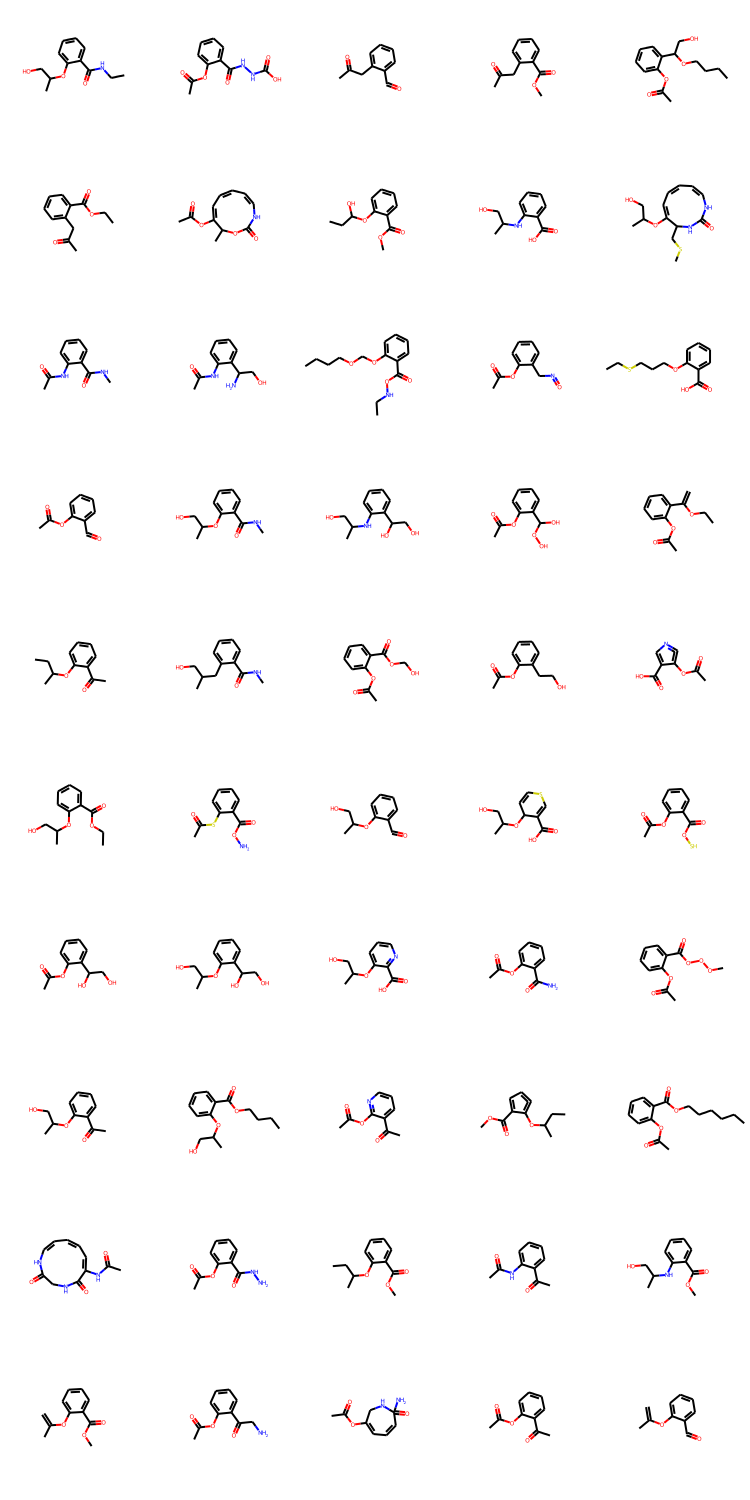

In [127]:
synthetizer_aspirine.smile_to_csv("{0}/conv-gru_aspirine_045.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150
    # save_path = '{0}/grid_conv-gru_aspirine_045.png'.format(IMAGES_PATH)
)

In [128]:
std_dev = 0.065
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

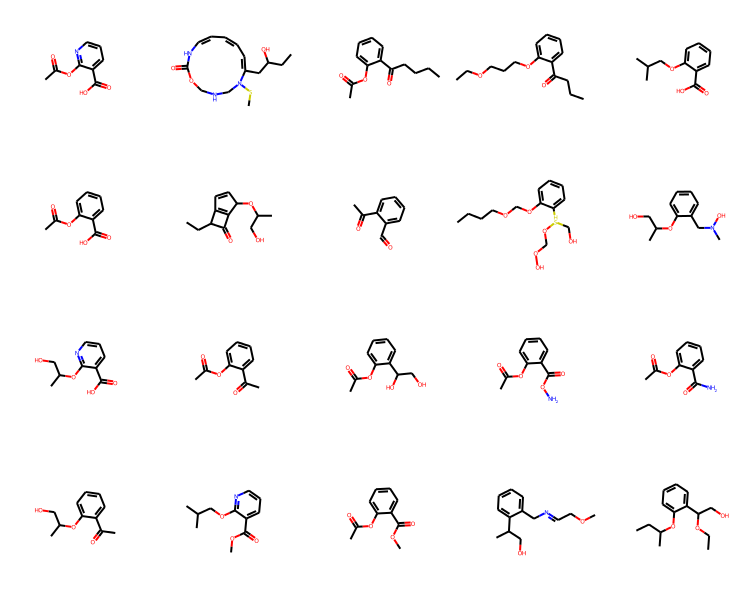

In [129]:
synthetizer_aspirine.smile_to_csv("{0}/conv-gru_aspirine_065.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150
    # save_path = '{0}/grid_conv-gru_aspirine_065.png'.format(IMAGES_PATH)
)

In [130]:
std_dev = 0.085
synthetizer_aspirine.synthetize_syntatically_valid_molecules(std_dev, 5000)

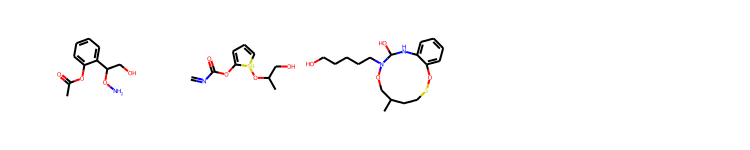

In [131]:
synthetizer_aspirine.smile_to_csv("{0}/conv-gru_aspirine_085.csv".format(GENERATED_SMILE_PATH))
synthetizer_aspirine.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150
    # save_path = '{0}/grid_conv-gru_aspirine_085.png'.format(IMAGES_PATH)
)

In [132]:
synthetizer_tamiflu = mol_gen.MoleculesSynthetizer(
    model = conv_gru_model,
    smile_string = tamiflu_smile,
    latent_dim = 196,
    one_hot_encoder = one_hot_enc,
    one_hot_decoder = one_hot_dec,
    device = 'cpu'
)

In [133]:
std_dev = 0.045
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



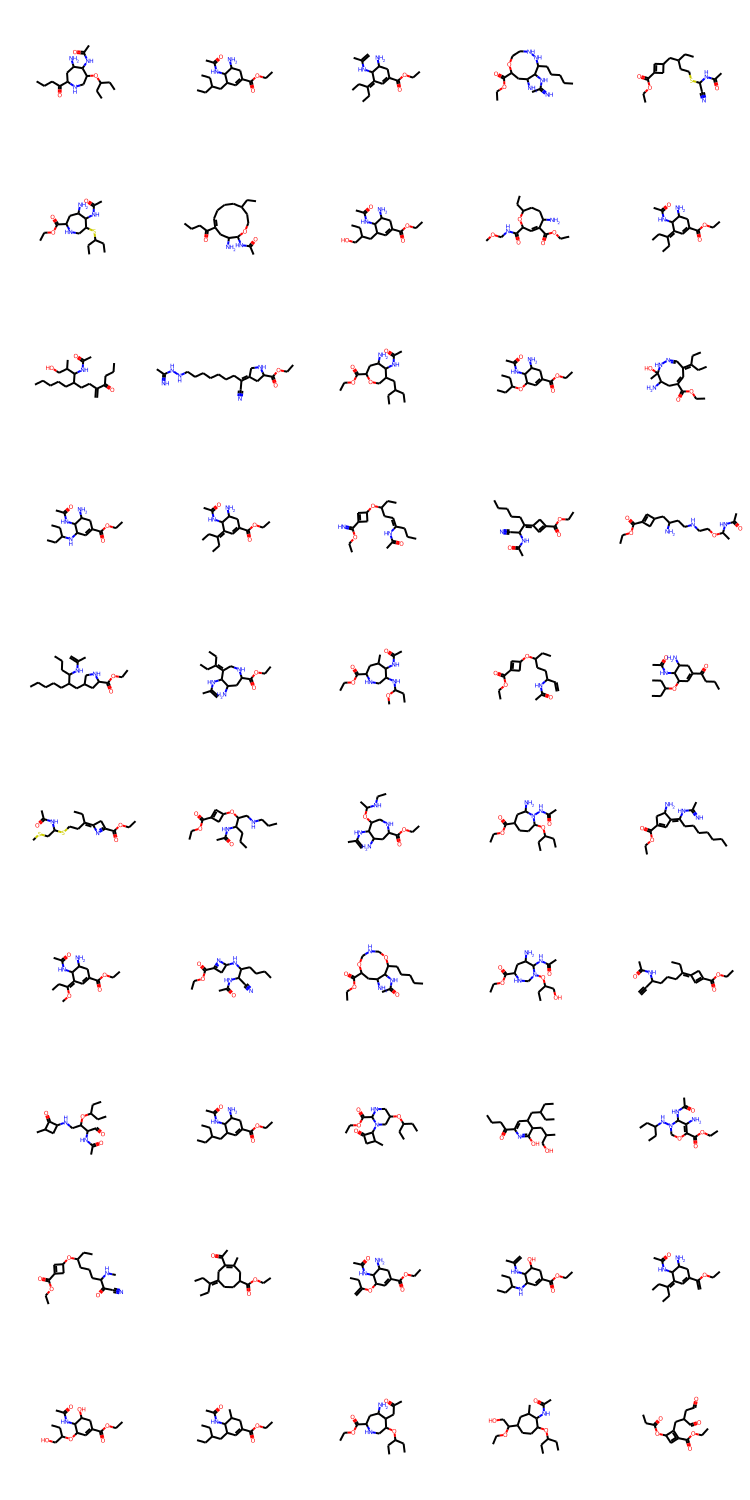

In [134]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-gru_tamiflu_045.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150
    # save_path = '{0}/grid_conv-gru_tamiflu_045.png'.format(IMAGES_PATH)
)

In [135]:
std_dev = 0.065
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

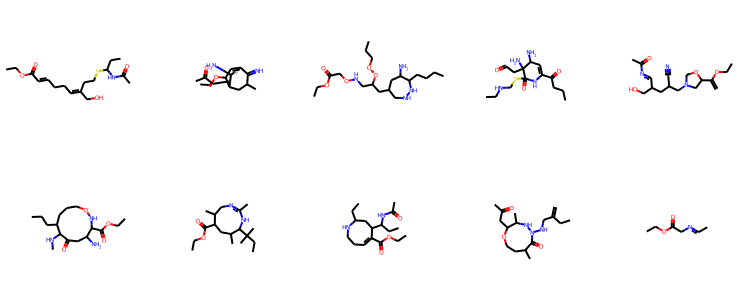

In [136]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-gru_tamiflu_065.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150
    # save_path = '{0}/grid_conv-gru_tamiflu_065.png'.format(IMAGES_PATH)
)

In [137]:
std_dev = 0.085
synthetizer_tamiflu.synthetize_syntatically_valid_molecules(std_dev, 5000)

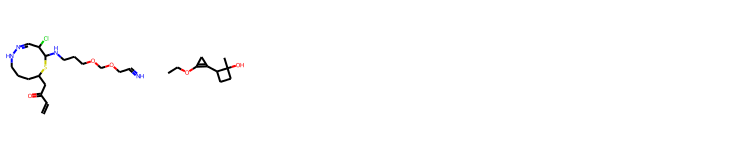

In [138]:
synthetizer_tamiflu.smile_to_csv("{0}/conv-gru_tamiflu_085.csv".format(GENERATED_SMILE_PATH))
synthetizer_tamiflu.synthetized_molecules_grid(
    start_index = 0,
    end_index = 50,
    mols_per_rows = 5,
    image_size = 150
    # save_path = '{0}/grid_conv-gru_tamiflu_085.png'.format(IMAGES_PATH)
)

In [139]:
conv_gru_aspirine_045 = pd.read_csv("{0}/conv-gru_aspirine_045.csv".format(GENERATED_SMILE_PATH))
conv_gru_aspirine_065 = pd.read_csv("{0}/conv-gru_aspirine_065.csv".format(GENERATED_SMILE_PATH))
conv_gru_aspirine_085 = pd.read_csv("{0}/conv-gru_aspirine_085.csv".format(GENERATED_SMILE_PATH))

conv_gru_tamiflu_045 = pd.read_csv("{0}/conv-gru_tamiflu_045.csv".format(GENERATED_SMILE_PATH))
conv_gru_tamiflu_065 = pd.read_csv("{0}/conv-gru_tamiflu_065.csv".format(GENERATED_SMILE_PATH))
conv_gru_tamiflu_085 = pd.read_csv("{0}/conv-gru_tamiflu_085.csv".format(GENERATED_SMILE_PATH))

In [140]:
synthetized_aspirine_045 = conv_gru_aspirine_045['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_aspirine_045)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_aspirine_045) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio, 
                 novelty_ratio = novelty_ratio,
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.2208
The ratio of chemically valid synthetized molecules: 0.5416666666666666
The ratio of unique chemically valid synthetized molecules: 0.26755852842809363
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.5029029701521064


In [141]:
synthetized_aspirine_065 = conv_gru_aspirine_065['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_aspirine_065)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_aspirine_065) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio, 
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0296
The ratio of chemically valid synthetized molecules: 0.13513513513513514
The ratio of unique chemically valid synthetized molecules: 1.0
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.37844501932039004


In [142]:
synthetized_aspirine_085 = conv_gru_aspirine_085['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_aspirine_085)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_aspirine_085) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio, 
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0074
The ratio of chemically valid synthetized molecules: 0.08108108108108109
The ratio of unique chemically valid synthetized molecules: 1.0
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.582982299589503


In [143]:
synthetized_tamiflu_045 = conv_gru_tamiflu_045['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_tamiflu_045)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_tamiflu_045) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio, 
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0556
The ratio of chemically valid synthetized molecules: 0.6870503597122302
The ratio of unique chemically valid synthetized molecules: 0.900523560209424
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.36360212042094325


In [144]:
synthetized_tamiflu_065 = conv_gru_tamiflu_065['synthetized_smiles']
chem_valid_smiles, chem_valid_num = me.chemical_validity(synthetized_tamiflu_065)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_tamiflu_065) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio, 
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0102
The ratio of chemically valid synthetized molecules: 0.19607843137254902
The ratio of unique chemically valid synthetized molecules: 1.0
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.3554204897220047


In [145]:
ßsynthetized_tamiflu_085 = conv_gru_tamiflu_085['synthetized_smiles']
chem_valid_smiles, hem_valid_num = me.chemical_validity(synthetized_tamiflu_085)
uniqueness_ratio = me.uniqueness(chem_valid_smiles)
novelty_ratio = me.novelty(train_set, chem_valid_smiles)
tanimoto_average = me.tanimoto_similarity_average(chem_valid_smiles)

print_statistics(valid_synt_ratio = len(synthetized_tamiflu_085) / 5000,
                 valid_chem_ratio = chem_valid_num,
                 uniqueness_ratio = uniqueness_ratio,
                 novelty_ratio = novelty_ratio,  
                 tanimoto_average = tanimoto_average)

The ratio of syntatically valid synthetized molecules: 0.0024
The ratio of chemically valid synthetized molecules: 0.19607843137254902
The ratio of unique chemically valid synthetized molecules: 1.0
The ratio of novelty chemically valid synthetized molecules: 1.0
The average of Tanimoto Similarity ratio: 0.7242647058823529
